In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn . model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier



plt.style.use("ggplot")


In [50]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\Reviews.csv")

In [51]:
df = df.head(6000)

In [52]:
df.shape

(6000, 10)

In [53]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


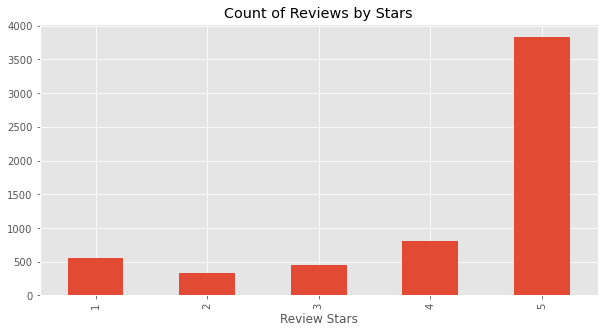

In [54]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [55]:
example = df["Text"][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [56]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [57]:
tagged = nltk.pos_tag(tokens)

tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [58]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [59]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [60]:
nltk.download('maxent_ne_chunker')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [61]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [62]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [64]:
sia.polarity_scores("I'm so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [65]:
sia.polarity_scores("Sadness is not a bad thing ")

{'neg': 0.331, 'neu': 0.343, 'pos': 0.326, 'compound': -0.0129}

In [66]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [67]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [68]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={"index":"Id"})
vader = vader.merge(df, how ='left')


In [69]:
vader

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,0.043,0.761,0.196,0.8316,B000I6PXLC,A1EWO3RDAXB4VO,J. OTTO,1,7,1,1278720000,This is not that great,You have to put a lot of sugar in this to mak...
5996,5997,0.093,0.835,0.072,-0.2505,B003SE52K8,AXSV7TB3PCP95,Linda Morton,5,5,5,1313280000,"The ""paws down"" favorite among canned food!","My female Pixie Bob cat, Pawnee, is extremely ..."
5997,5998,0.123,0.743,0.134,0.9181,B003SE52K8,A14JSPGLFT4C68,Brian Field,4,4,5,1331596800,Worked great for my cat,This is a great food and my cat loves it! The ...
5998,5999,0.081,0.850,0.069,-0.2560,B003SE52K8,AHDUT7IGZW7HY,"AlleyCat Advocat ""Laure""",4,4,5,1312761600,IBD food that my cat will actually eat!!!!!!!!,I was at my wits end with hypoallergenic foods...


In [70]:
vader = vader.drop(vader.index[0])

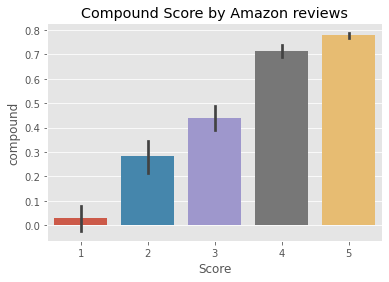

In [71]:
ax = sns.barplot(data= vader, x="Score", y="compound")
ax.set_title("Compound Score by Amazon reviews")
plt.show()

In [72]:
vader

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,0.043,0.761,0.196,0.8316,B000I6PXLC,A1EWO3RDAXB4VO,J. OTTO,1,7,1,1278720000,This is not that great,You have to put a lot of sugar in this to mak...
5996,5997,0.093,0.835,0.072,-0.2505,B003SE52K8,AXSV7TB3PCP95,Linda Morton,5,5,5,1313280000,"The ""paws down"" favorite among canned food!","My female Pixie Bob cat, Pawnee, is extremely ..."
5997,5998,0.123,0.743,0.134,0.9181,B003SE52K8,A14JSPGLFT4C68,Brian Field,4,4,5,1331596800,Worked great for my cat,This is a great food and my cat loves it! The ...
5998,5999,0.081,0.850,0.069,-0.2560,B003SE52K8,AHDUT7IGZW7HY,"AlleyCat Advocat ""Laure""",4,4,5,1312761600,IBD food that my cat will actually eat!!!!!!!!,I was at my wits end with hypoallergenic foods...


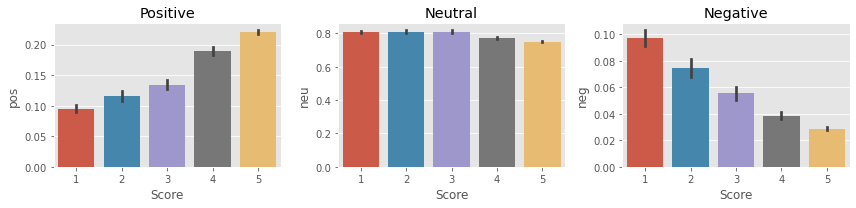

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vader, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vader, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [74]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [75]:

MODEL = "-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


HFValidationError: Repo id must use alphanumeric chars or '-', '_', '.', '--' and '..' are forbidden, '-' and '.' cannot start or end the name, max length is 96: '-base'.

In [ ]:
import torch 

In [ ]:
encoded_text = tokenizer(example)

# Assuming encoded_text is a dictionary
input_ids = torch.tensor(encoded_text["input_ids"]).unsqueeze(0)  # Convert to tensor and add batch dimension
attention_mask = torch.tensor(encoded_text["attention_mask"]).unsqueeze(0)  # Convert to tensor and add batch dimension

output = model(input_ids=input_ids, attention_mask=attention_mask)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    
    input_ids = torch.tensor(encoded_text["input_ids"]).unsqueeze(0)  # Convert to tensor and add batch dimension
    attention_mask = torch.tensor(encoded_text["attention_mask"]).unsqueeze(0)  # Convert to tensor and add batch dimension

    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict
    

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row["Text"]
        my_id = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[my_id] = both
    except RuntimeError:
        print(f'Broke for id {my_id}')


In [ ]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns={"index":"Id"})
results = results.merge(df, how='left')

In [ ]:
sns.pairplot(data=results,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
results.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
!pip install xformers 


In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline("it's a complicated decison to make")

In [ ]:
sent_pipeline("i may not be fully satisfied ")

In [ ]:
sent_pipeline("this oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.")